## Q1 Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def process_dating_csv(input_file: str, output_file: str):
    # Read the dataset
    df = pd.read_csv(input_file)
    ######################################################################
    # Function to remove quotes and count changes
    def remove_quotes(df, columns):
        changed_cells = 0
        def strip_quotes(cell_value):
            nonlocal changed_cells
            if isinstance(cell_value, str) and (cell_value.startswith("'") or cell_value.endswith("'")):
                cleaned_value = cell_value.strip("'")
                if cleaned_value != cell_value:
                    changed_cells += 1
                return cleaned_value
            return cell_value

        for col in columns:
            df[col] = df[col].apply(strip_quotes)
        print(f"Quotes removed from {changed_cells} cells.")
    
    # Apply the quote removal
    remove_quotes(df, ['race', 'race_o', 'field'])

    ######################################################################
    # Function to convert the 'field' column to lowercase
    def standardize_lowercase(df, column):
        changed_cells_lowercase = 0
        def to_lower(cell_value):
            nonlocal changed_cells_lowercase
            if isinstance(cell_value, str) and cell_value != cell_value.lower():
                changed_cells_lowercase += 1
                return cell_value.lower()
            return cell_value

        df[column] = df[column].apply(to_lower)
        print(f"Standardized {changed_cells_lowercase} cells to lower case.")

    # Apply lowercase conversion
    standardize_lowercase(df, 'field')

    ######################################################################
    # Function to label encode specified columns
    def label_encode_columns(df, columns):
        label_encodings = {} # Creat a new dictionary
        for col in columns:
            unique_values = sorted(df[col].unique())  # Sort alphabetically/lexicographically
            label_encodings[col] = {val: idx for idx, val in enumerate(unique_values)} # label_encodings[col] means creat a key[col] in the dictionary
                                                                                       # This constructs a dictionary by looping through (for loop)
            df[col] = df[col].map(label_encodings[col])
        
        # Output specific mappings
        print(f"Value assigned for male in column gender: {label_encodings['gender'].get('male', 'Not found')}.")
        print(f"Value assigned for European/Caucasian-American in column race: {label_encodings['race'].get('European/Caucasian-American', 'Not found')}.")
        print(f"Value assigned for Latino/Hispanic American in column race_o: {label_encodings['race_o'].get('Latino/Hispanic American', 'Not found')}.")
        print(f"Value assigned for law in column field: {label_encodings['field'].get('law', 'Not found')}.")
    
    # Apply label encoding
    label_encode_columns(df, ['gender', 'race', 'race_o', 'field'])

    ######################################################################
    # Function to normalize scores for specified columns
    def normalize_scores(df, columns, total_column):
        df[total_column] = df[columns].sum(axis=1) # axis =1 means "across columns",For example, if columns = ['math', 'science', 'english'], 
                                                   # this will calculate the sum of these three scores for each row.
        for col in columns:
            df[col] = df[col] / df[total_column]
    
    # Normalize the participant and partner scores
    participant_columns = ['attractive_important', 'sincere_important', 'intelligence_important', 
                           'funny_important', 'ambition_important', 'shared_interests_important']
    partner_columns = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 
                       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
    
    normalize_scores(df, participant_columns, 'participant_total')
    normalize_scores(df, partner_columns, 'partner_total')
    ######################################################################
    # Function to calculate and print the mean for specified columns
    def calculate_means(df, columns):
        for col in columns:
            mean_value = round(df[col].mean(), 2)    #df[col].mean(): This calculates the mean (average) of the values in the column col.
                                                     #round(..., 2): The result is rounded to 2 decimal
            print(f"Mean of {col}: {mean_value}")
    
    # Calculate and print means
    calculate_means(df, participant_columns)
    calculate_means(df, partner_columns)
    ######################################################################
    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)
    ######################################################################
# call process_dating_csv function 
process_dating_csv(r'C:\Users\chen4469\OneDrive - purdue.edu\2.course\5.2024 fall\CS 573\2. HW\HW 2\dating-full.csv', 'dating.csv')

Quotes removed from 8316 cells.
Standardized 5707 cells to lower case.
Value assigned for male in column gender: 1.
Value assigned for European/Caucasian-American in column race: 2.
Value assigned for Latino/Hispanic American in column race_o: 3.
Value assigned for law in column field: 121.
Mean of attractive_important: 0.22
Mean of sincere_important: 0.17
Mean of intelligence_important: 0.2
Mean of funny_important: 0.17
Mean of ambition_important: 0.11
Mean of shared_interests_important: 0.12
Mean of pref_o_attractive: 0.22
Mean of pref_o_sincere: 0.17
Mean of pref_o_intelligence: 0.2
Mean of pref_o_funny: 0.17
Mean of pref_o_ambitious: 0.11
Mean of pref_o_shared_interests: 0.12


## Q2 Visualizing interesting trends in data

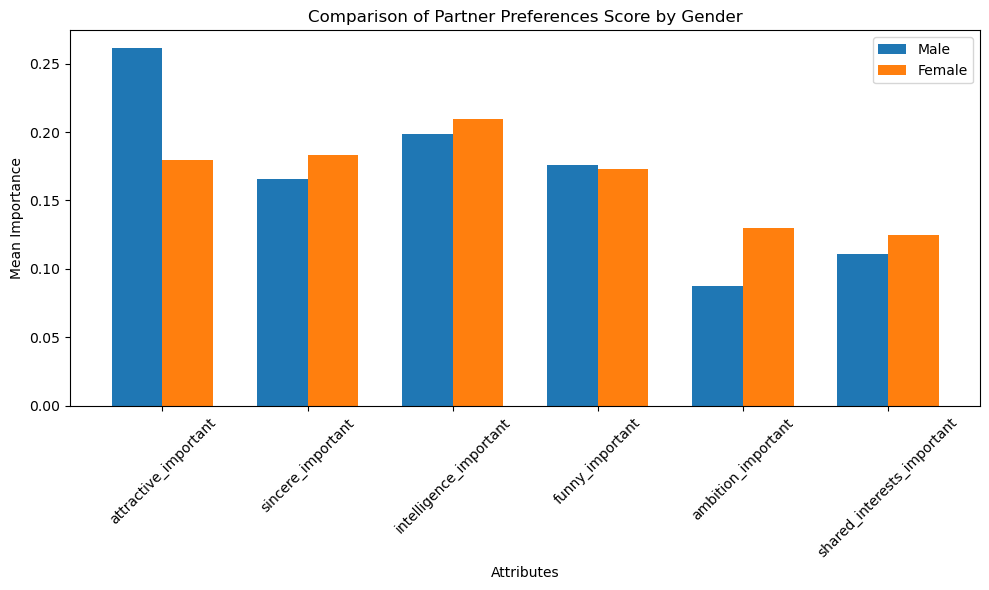

In [155]:
def visualize_preferences(input_file: str):
    # Load the dataset
    df = pd.read_csv(input_file)

    # Define the participant preference columns
    preference_columns = ['attractive_important', 'sincere_important', 'intelligence_important', 
                          'funny_important', 'ambition_important', 'shared_interests_important']
    
    # Divide the dataset by gender
    male_df = df[df['gender'] == 1]  # code 1 is for male, adjust based on encoding
    female_df = df[df['gender'] == 0]  # code 0 is for female, adjust based on encoding
    
    # Compute the mean values for each column in the preference scores for males and females
    male_means = male_df[preference_columns].mean()
    female_means = female_df[preference_columns].mean()
    
    # Prepare data for bar plot
    x = np.arange(len(preference_columns))  # the label locations
    #This function from the NumPy library generates an array of evenly spaced values. 
    #By default, it creates values starting from 0 up to, but not including, the specified number.
    
    width = 0.35  # the width of the bars

    # Plotting using pandas and numpy
    fig, ax = plt.subplots(figsize=(10, 6)) #This line creates a figure (fig) and an axes object (ax) for the plot. 
    # The figure size is set to 10 inches by 6 inches. # fig is the entire figure (the container for the plot).
    # ax represents the subplot or the actual plot where the bars will be drawn.

    # Plot male and female preferences
    ax.bar(x - width/2, male_means, width, label='Male')
    ax.bar(x + width/2, female_means, width, label='Female')

    # Add some text for labels, title and custom x-axis tick labels
    ax.set_xlabel('Attributes')
    ax.set_ylabel('Mean Importance')
    ax.set_title('Comparison of Partner Preferences Score by Gender')
    ax.set_xticks(x)
    ax.set_xticklabels(preference_columns, rotation=45)
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

#barchat of different gender
visualize_preferences ('dating.csv')

Males' Preferences: Attractiveness is rated the highest by males, showing that it is an important characteristic they prioritize in romantic partners.
Intelligence and funny attributes are also valued but to a slightly lesser degree.Ambition seems to be the least prioritized attribute by males, compared to the other traits.  

Females' Preferences:Intelligence is the top-rated characteristics for females. Sincerity, attractiveness, and funny attributes are also valued but to a slightly lesser degree.

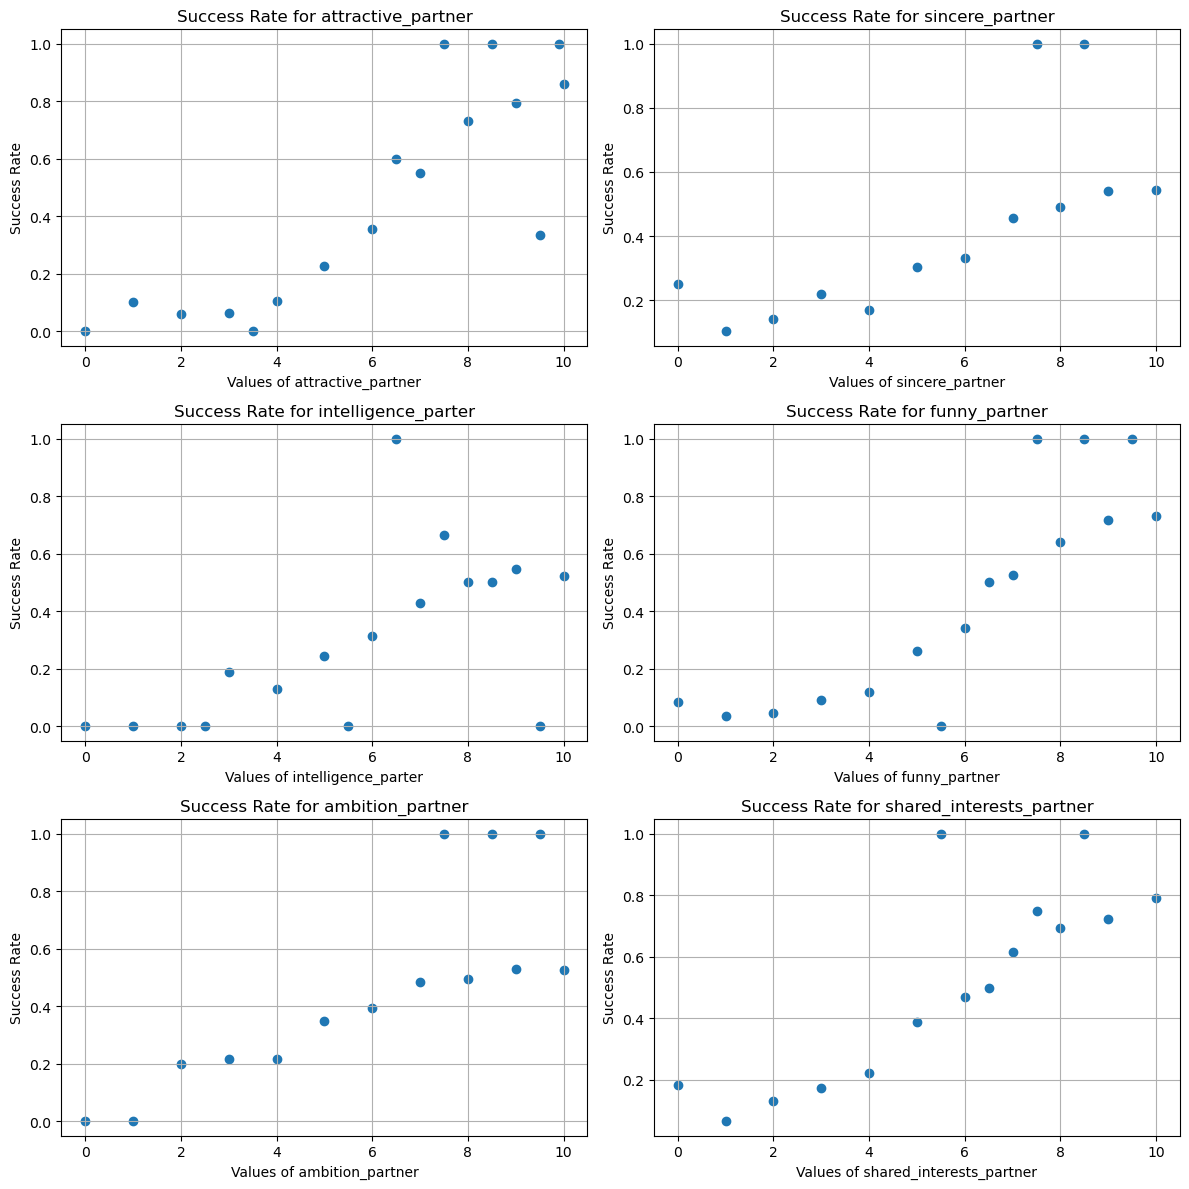

In [174]:
def analyze_ratings(input_file: str):
    # Load the dataset
    df = pd.read_csv(input_file)

    # Define the six attributes in the set rating_of_partner_from_participant
    rating_columns = ['attractive_partner', 'sincere_partner', 'intelligence_parter',  
                      'funny_partner', 'ambition_partner', 'shared_interests_partner']

    # Determine the number of distinct values for each attribute
    distinct_values = {col: df[col].nunique() for col in rating_columns}

    # Compute success rate for each value of each attribute
    success_rates = {}
    for col in rating_columns:
        success_rates[col] = {}
        # Get the distinct values for the column
        distinct_vals = df[col].unique()
        for val in distinct_vals:
            # Get the subset of participants with this rating
            subset = df[df[col] == val]
            # Calculate the success rate (fraction of participants who gave a second date)
            success_rate = subset['decision'].mean()  # Using 'decision' column
            success_rates[col][val] = success_rate

    # Generate scatter plots for each attribute
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3x2 grid of subplots
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration

    for idx, col in enumerate(rating_columns):
        values = list(success_rates[col].keys())
        rates = list(success_rates[col].values())
        axes[idx].scatter(values, rates)
        axes[idx].set_title(f'Success Rate for {col}')
        axes[idx].set_xlabel(f'Values of {col}')
        axes[idx].set_ylabel('Success Rate')
        axes[idx].grid(True)

    plt.tight_layout()  # Adjusts the spacing between subplots for better display
    plt.show()
# the scatter plots of success rate
analyze_ratings('dating.csv')

Across all attributes, there is a general trend where higher values for each partner attribute are associated with higher success rates.  
The increase in success rate is most pronounced for attractiveness, intelligence, and funny attributes, while attributes like sincerity, ambition, and shared interests also show positive correlations but with a more gradual rise.                   

## Q3 Convert continuous attributes to categorical attributes

In [79]:
def discretize_columns(input_file: str, output_file: str, bin_num):
    # Load the dataset
    df = pd.read_csv(input_file)

    # Define the columns to discretize (as continuous-valued columns) and their respective ranges
    continuous_columns = {
        'age': (18, 58),
        'age_o': (18, 58),
        'importance_same_race': (0, 10),
        'importance_same_religion': (0, 10),
        'pref_o_attractive': (0, 1),
        'pref_o_sincere': (0, 1),
        'pref_o_intelligence': (0, 1),
        'pref_o_funny': (0, 1),
        'pref_o_ambitious': (0, 1),
        'pref_o_shared_interests': (0, 1),
        'attractive_important': (0, 1),
        'sincere_important': (0, 1),
        'intelligence_important': (0, 1),
        'funny_important': (0, 1),
        'ambition_important': (0, 1),
        'shared_interests_important': (0, 1),
        'attractive': (0, 10),
        'sincere': (0, 10),
        'intelligence': (0, 10),
        'funny': (0, 10),
        'ambition': (0, 10),
        'attractive_partner': (0, 10),
        'sincere_partner': (0, 10),
        'intelligence_parter': (0, 10),
        'funny_partner': (0, 10),
        'ambition_partner': (0, 10),
        'shared_interests_partner': (0, 10),
        'sports': (0, 10),
        'tvsports': (0, 10),
        'exercise': (0, 10),
        'dining': (0, 10),
        'museums': (0, 10),
        'art': (0, 10),
        'hiking': (0, 10),
        'gaming': (0, 10),
        'clubbing': (0, 10),
        'reading': (0, 10),
        'tv': (0, 10),
        'theater': (0, 10),
        'movies': (0, 10),
        'concerts': (0, 10),
        'music': (0, 10),
        'shopping': (0, 10),
        'yoga': (0, 10),
        'interests_correlate': (-1, 1),  # Specific range for correlation
        'expected_happy_with_sd_people': (0, 10),
        'like': (0, 10)
    }

    # Dictionary to hold the bin counts
    bin_counts = {}

    # Process each column
    for col, (min_val, max_val) in continuous_columns.items():
        # Treat values outside the range as the maximum value
        df[col] = df[col].clip(lower=min_val, upper=max_val)

        # Create equal-width bins for the column based on bin_num
        df[col], bins = pd.cut(df[col], bins=bin_num, retbins=True, labels=False, include_lowest=True)

        # Count the number of items in each bin
        bin_count = np.bincount(df[col])
        bin_counts[col] = bin_count

    # Save the binned dataset to a new CSV file
    df.to_csv(output_file, index=False)
    
    # Return the bin counts
    return bin_counts

# Example usage
bin_counts = discretize_columns('dating.csv', 'dating-binned.csv', 5)

# Print the number of items in each bin for each column
for column, values in bin_counts.items():
    #Convert np.int64 values to regular integers
    clean_values = [int(val) for val in values]
    #Join the integers and format them for printing
    print(f"{column}: {clean_values}")

age: [3032, 3390, 297, 20, 5]
age_o: [2990, 3362, 371, 16, 5]
importance_same_race: [2980, 1213, 977, 1013, 561]
importance_same_religion: [3203, 1188, 1110, 742, 501]
pref_o_attractive: [4333, 1987, 344, 51, 29]
pref_o_sincere: [1416, 4378, 865, 79, 6]
pref_o_intelligence: [666, 3935, 1873, 189, 81]
pref_o_funny: [1255, 4361, 1048, 55, 25]
pref_o_ambitious: [1963, 2352, 2365, 42, 22]
pref_o_shared_interests: [1506, 2068, 1981, 1042, 147]
attractive_important: [4323, 2017, 328, 57, 19]
sincere_important: [546, 2954, 2782, 377, 85]
intelligence_important: [630, 3976, 1861, 210, 67]
funny_important: [1282, 4306, 1070, 58, 28]
ambition_important: [1913, 2373, 2388, 49, 21]
shared_interests_important: [1464, 2197, 1950, 1007, 126]
attractive: [131, 726, 899, 4122, 866]
sincere: [57, 228, 352, 2715, 3392]
intelligence: [127, 409, 732, 3190, 2286]
funny: [19, 74, 1000, 2338, 3313]
ambition: [225, 697, 559, 2876, 2387]
attractive_partner: [284, 948, 2418, 2390, 704]
sincere_partner: [94, 353,

## Q4 Training-Test Split

In [81]:
def split_train_test(input_file: str, train_file: str, test_file: str):
    # Read the dataset from the CSV file
    df = pd.read_csv(input_file)
    
    # Randomly sample 20% of the data for the test set using random_state=47
    test_set = df.sample(frac=0.2, random_state=47)
    
    # The remaining 80% will be used as the training set
    train_set = df.drop(test_set.index)
    
    # Save the test set to a CSV file
    test_set.to_csv(test_file, index=False)
    
    # Save the training set to a CSV file
    train_set.to_csv(train_file, index=False)

# Call the function with input and output file names
split_train_test('dating-binned.csv', 'trainingSet.csv', 'testSet.csv')

## Q5 Implement a Naive Bayes Classifier

(a)

In [83]:
# Function to calculate prior probabilities and likelihoods
def calculate_class_probabilities(df, target_col):
    # Separate the data by class
    class_probabilities = {}
    total_count = len(df)

    for class_value in df[target_col].unique():
        # Filter rows of this class
        class_data = df[df[target_col] == class_value]
        class_prob = len(class_data) / total_count  # Prior probability P(Class)
        
        # Calculate likelihoods P(Feature | Class)
        feature_probabilities = {}
        for feature in df.columns:
            if feature == target_col:
                continue
            feature_probabilities[feature] = {}
            for value in df[feature].unique():
                feature_likelihood = len(class_data[class_data[feature] == value]) / len(class_data)
                feature_probabilities[feature][value] = feature_likelihood
        
        class_probabilities[class_value] = {
            'prior': class_prob,
            'likelihoods': feature_probabilities
        }
    
    return class_probabilities

# Function to predict class for a single instance
def predict_instance(instance, class_probabilities):
    results = {}
    for class_value, class_info in class_probabilities.items():
        total_prob = np.log(class_info['prior'])  # Log of prior probability

        for feature, value in instance.items():
            if feature in class_info['likelihoods']:
                feature_probs = class_info['likelihoods'][feature]
                
                # Use Laplace smoothing: avoid zero probabilities
                likelihood = feature_probs.get(value, 1e-6)  # Get the likelihood or a small value
                
                # Ensure we don't pass zero or negative numbers to log
                likelihood = max(likelihood, 1e-6)
                total_prob += np.log(likelihood)

        results[class_value] = total_prob
    
    return max(results, key=results.get)

# Main Naive Bayes function
def nbc(t_frac, train_file, test_file):

    # Load the datasets from CSV files
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    # Sample the fraction of training data
    train_sample = train_df.sample(frac=t_frac, random_state=47)
    
    # Calculate class probabilities and likelihoods
    class_probabilities = calculate_class_probabilities(train_sample, 'decision')

    # Predict on training data and calculate training accuracy
    train_preds = train_sample.drop('decision', axis=1).apply(lambda x: predict_instance(x, class_probabilities), axis=1)
    train_accuracy = np.mean(train_preds == train_sample['decision'])

    # Predict on test data and calculate test accuracy
    test_preds = test_df.drop('decision', axis=1).apply(lambda x: predict_instance(x, class_probabilities), axis=1)
    test_accuracy = np.mean(test_preds == test_df['decision'])

    # Print accuracies
    print(f"Training Accuracy: {round(train_accuracy, 2)}")
    print(f"Testing Accuracy: {round(test_accuracy, 2)}")

    return train_accuracy,test_accuracy

# call function nbc using full training data
nbc(1, 'trainingSet.csv', 'testSet.csv')

Training Accuracy: 0.78
Testing Accuracy: 0.74


(0.7829471733086191, 0.7449962935507783)

(b)

Bin size: 2
Training Accuracy: 0.76
Testing Accuracy: 0.71
Bin size: 5
Training Accuracy: 0.78
Testing Accuracy: 0.74
Bin size: 10
Training Accuracy: 0.79
Testing Accuracy: 0.75
Bin size: 50
Training Accuracy: 0.8
Testing Accuracy: 0.76
Bin size: 100
Training Accuracy: 0.81
Testing Accuracy: 0.76
Bin size: 200
Training Accuracy: 0.81
Testing Accuracy: 0.75


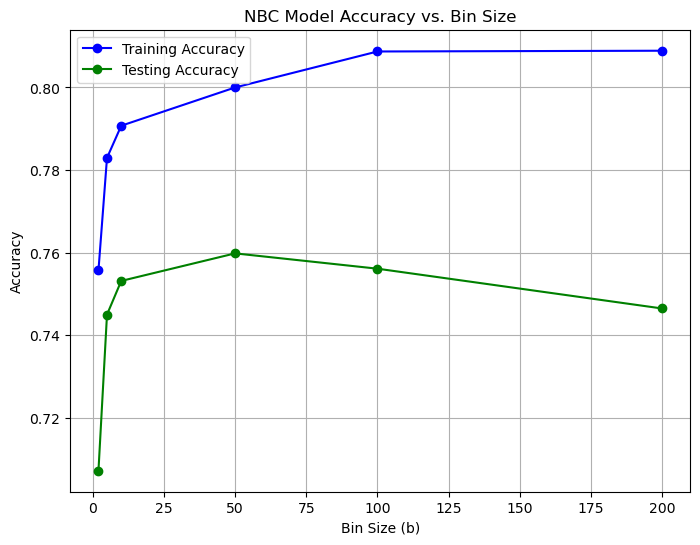

In [87]:
# Define the bin sizes
bin_sizes = [2, 5, 10, 50, 100, 200]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop over different bin sizes
for bins_num in bin_sizes:

    # Use f-string to format the filenames for different bin sizes
    output_file = f'dating-binned_{bins_num}.csv'
    train_file = f'train_file_{bins_num}.csv'
    test_file = f'test_file_{bins_num}.csv'

    # Call the discretization and splitting functions
    discretize_columns('dating.csv', output_file, bins_num)
    split_train_test(output_file, train_file, test_file)

    #print the bin size note
    print(f"Bin size: {bins_num}")

    # Call the NBC function
    train_accuracy,test_accuracy= nbc(1, train_file, test_file)

    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(bin_sizes, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(bin_sizes, test_accuracies, marker='o', label='Testing Accuracy', color='green')

# Add labels and title
plt.xlabel('Bin Size (b)')
plt.ylabel('Accuracy')
plt.title('NBC Model Accuracy vs. Bin Size')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

The divergence between training accuracy and testing accuracy as bin size increases suggests potential overfitting, where the model performs better on the training data but fails to generalize as effectively to unseen data.  
The optimal bin size for this model seems to be around 50 to 100, where testing accuracy is maximized without significant overfitting.  
In conclusion, while increasing bin size improves training accuracy, testing accuracy starts to decline after a certain point.

(c)

The value of f: 0.01
Training Accuracy: 1.0
Testing Accuracy: 0.63
The value of f: 0.1
Training Accuracy: 0.87
Testing Accuracy: 0.71
The value of f: 0.2
Training Accuracy: 0.81
Testing Accuracy: 0.72
The value of f: 0.5
Training Accuracy: 0.8
Testing Accuracy: 0.74
The value of f: 0.6
Training Accuracy: 0.79
Testing Accuracy: 0.74
The value of f: 0.75
Training Accuracy: 0.78
Testing Accuracy: 0.75
The value of f: 0.9
Training Accuracy: 0.78
Testing Accuracy: 0.75
The value of f: 1
Training Accuracy: 0.78
Testing Accuracy: 0.74


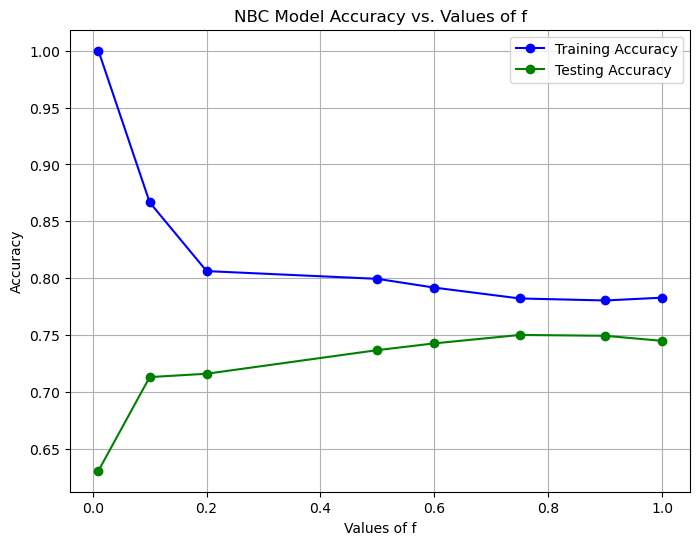

In [85]:
# Define the f value
t_frac_value = [0.01, 0.1, 0.2, 0.5, 0.6, 0.75, 0.9, 1]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

for t_frac in t_frac_value:

    #print the f value note
    print(f"The value of f: {t_frac}")

    #call nbc and capture the train_accuracy and test_accuracy
    train_accuracy,test_accuracy= nbc(t_frac, 'trainingSet.csv', 'testSet.csv')

    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_frac_value, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(t_frac_value, test_accuracies, marker='o', label='Testing Accuracy', color='green')

# Add labels and title
plt.xlabel('Values of f')
plt.ylabel('Accuracy')
plt.title('NBC Model Accuracy vs. Values of f')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

The significant gap between training and testing accuracy at lower f values (especially f = 0) indicates that the model is likely overfitting, as it achieves perfect training accuracy but poor generalization to the testing set.  
As f increases, the model becomes less overfitted and more generalizable, leading to an improvement in testing accuracy, particularly between f = 0.2 and f = 0.6.The best balance between training and testing accuracy appears to be around f = 0.6, where the testing accuracy is highest, indicating a good trade-off between underfitting and overfitting.  
Beyond that, further increases in f do not significantly enhance the model's performance and may even slightly degrade it.